In [14]:
# http://selenium-python.readthedocs.io/getting-started.html
import time 
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
import glob
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import re

In [63]:
screenshots_dir = '../screenshots/'
selenium_path = '../selenium/'
driver_path = selenium_path + 'chromedriver'
adblock_path = selenium_path + 'adblock/1.500_0/'
video_url='https://youtu.be/Nf_pakPwZg0?t=20m33s'
data_path = "../screenshots/"
images = glob.glob(data_path+'lcs*.png')

In [57]:
def crop_scoreboard(img):
    return img[1560:1945,1060:2310]

def get_team1_scores(scoreboard):
    return scoreboard[:, 350:550]

def get_team2_scores(scoreboard):
    return scoreboard[:, 715:910]
def invert_img(img):
    return cv2.bitwise_not(img)

def greyscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def binary_threshold(img):
    _,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    return thresh

def thicken(img):
    return cv2.medianBlur(img,3)

def get_scores(scores_img, side=None):
    delimiters=' /'
    regex = "[{0}]+".format(delimiters)
    invert = invert_img(scores_img)
    thresh = binary_threshold(invert)
    thick = thicken(thresh)
    text = pytesseract.image_to_string(thick, config="-c tessedit_char_whitelist=/0123456789 -psm 6")
    players = text.split('\n')
    player_score = [[int(val) for val in re.split(regex, player_txt)] for player_txt in players]
    if side == 'right':
        player_score = [player[1:] +[player[0]] for player in player_score]
    return player_score
        

def get_curr_scores(scoreboard):
    team1, team2 = get_team1_scores(scoreboard), get_team2_scores(scoreboard)
    return {'left': get_scores(team1, 'left'), 'right': get_scores(team2, 'right')}

In [58]:
def get_scores_from_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return get_curr_scores(crop_scoreboard(img))

def show_img(img, gray=False):
    plt.figure(figsize=(10,10))
    if (gray):
        plt.imshow(img, 'gray')
    else:
        plt.imshow(img)
        
def show_img_from_path(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    show_img(img, False)

In [59]:
img_name = 'curr_img.png'
curr_img_path = screenshots_dir + img_name

screenshot 0
{'left': [[1, 1, 1, 107], [1, 1, 1, 68], [0, 0, 0, 118], [0, 1, 0, 115], [0, 0, 0, 16]], 'right': [[1, 2, 0, 108], [1, 0, 1, 64], [0, 0, 2, 120], [1, 0, 0, 127], [0, 0, 2, 21]]}
screenshot 1
{'left': [[1, 1, 1, 107], [1, 1, 1, 68], [0, 0, 0, 118], [0, 1, 0, 115], [0, 0, 0, 16]], 'right': [[1, 2, 0, 108], [1, 0, 1, 64], [0, 0, 2, 120], [1, 0, 0, 127], [0, 0, 2, 21]]}
screenshot 2
{'left': [[1, 1, 1, 107], [1, 1, 1, 68], [0, 0, 0, 118], [0, 1, 0, 115], [0, 0, 0, 16]], 'right': [[1, 2, 0, 108], [1, 0, 1, 64], [0, 0, 2, 120], [1, 0, 0, 127], [0, 0, 2, 21]]}


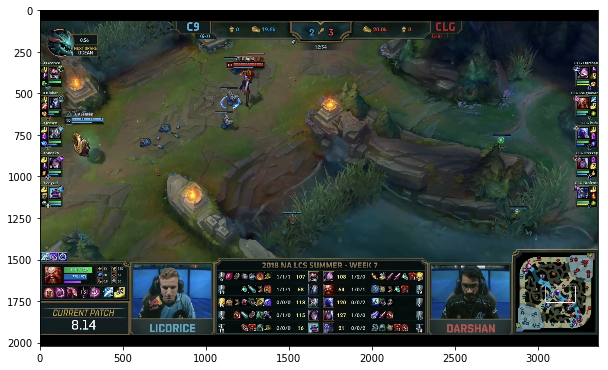

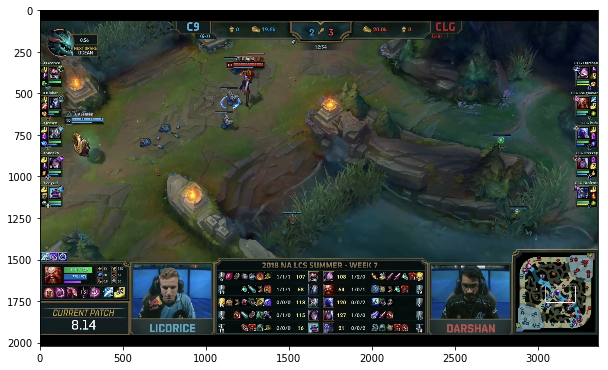

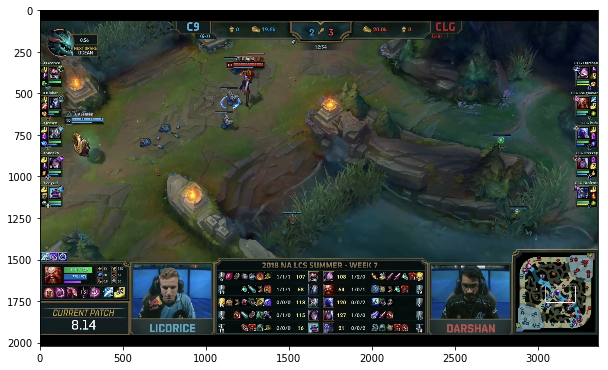

In [67]:
chrome_options = Options()
chrome_options.add_argument('load-extension=' + adblock_path)
chrome_options.add_argument("--window-size=1920,1080")
# chrome_options.add_argument("--headless")  
chrome_options.add_argument("--mute-audio")
driver = webdriver.Chrome(driver_path, chrome_options=chrome_options) 
driver.create_options()
try:
    wait = WebDriverWait(driver, timeout=10)
    driver.get(video_url)
#     fullscreen = driver.find_element_by_class_name('ytp-fullscreen-button')
    
#     wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, '.ytp-play-button')))
#     time.sleep(2)
#     wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, '.ytp-fullscreen-button'))).send_keys('f')
#     time.sleep(2)
#     body = driver.find_element_by_tag_name("body");
#     body.send_keys('f')
#     time.sleep(3)
#     driver.save_screenshot(screenshots_dir + 'bla.png')
#     time.sleep(2)
    
#     time.sleep(2)
#     elem.click()
#     elem.send_keys('f')

    driver.save_screenshot(screenshots_dir+'bla.png')
    time.sleep(2)
    webdriver.ActionChains(driver).send_keys('f').perform()
    time.sleep(1)
    wait.until(EC.invisibility_of_element_located((By.CSS_SELECTOR, '.ytp-play-button')))
#     elem.click()
    for idx in range(3):
#         driver.save_screenshot(img_path)
#         print(get_scores_from_img(img_path))
#         new_img_path = screenshots_dir+'cgopt_new{0}'.format(idx)+'.png'
        driver.save_screenshot(curr_img_path)
        print('screenshot {0}'.format(idx))
        show_img_from_path(new_img_path)
        print(get_scores_from_img(new_img_path))
        time.sleep(5)
finally:
    driver.quit()